# Seaborn 
   - matplotlib을 기반으로 하는 Python 데이타 시각화 라이브러리
   - 매력적이고 유익한 통계 그래픽을 그리기 위한 고급 인터페이스 제공

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

- 스타일 처리 : R의 ggolot과 유사하도록 처리

In [2]:
from matplotlib import style
style.use('ggplot')

In [3]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

### 한글 폰트 설정

In [4]:
import sys

from matplotlib import font_manager, rc

if sys.platform  == 'darwin':
    path = '/Library/Fonts/AppleGothic.ttf'  
elif sys.platform == 'win32':
    path = "c:/Windows/Fonts/malgun.ttf"
else:
    print('Unknown system... sorry~~~~') 
    
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

### 파이 그래프

In [5]:
# 원 그래프에 들어가 레이블과 비율
labels = ['삼성전자', 'sk하이닉스', 'LG전자', '네이버', '카카오']
ratio = [50, 20, 10, 10, 10] 

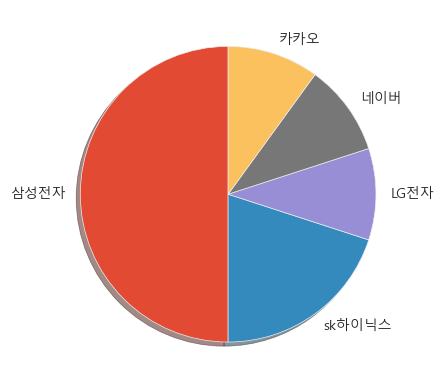

In [6]:
plt.pie(ratio, labels=labels, shadow=True, startangle=90)    ## 파이그래프를 그린다.
plt.show()

### PyeChart로 파이 그래프 그리기

In [7]:
import pyecharts.charts as cht                  ## 동적인 시각화 모듈을 사용한다. 
from pyecharts import options as opts

In [8]:
pie = cht.Pie()                                              ## 파이 그래프 객체를 만든다. 

pie.add("회사 규모 ", list(zip(labels, ratio)), radius=100)           ## 그래프 내의 레이블과 데이터를 지정한다. 
                                                                ## 제목과 부제목을 지정하다. 
                                                      
pie .set_global_opts(title_opts=opts.TitleOpts(title="주요 기업", subtitle="2017-2018 Revenue"),
                     toolbox_opts=opts.ToolboxOpts())                 ## 툴박스도 지정한다
pie.render_notebook() 

- 파이 그래프 원 내부 공간을 비우려면 반지름 radius 매개변수에 리스트로 인자를 전달하여 처리

In [9]:
pie = cht.Pie()

pie.add("회사 규모 ", list(zip(labels, ratio)), radius=[40, 75])    ## 파이 내부를 빈 공간으로 만들기 위ㅐ 반지름의 범위를 지정한다.

pie .set_global_opts(title_opts=opts.TitleOpts(title="주요 기업", subtitle="2017-2018 Revenue"),
                     toolbox_opts=opts.ToolboxOpts())
pie.render_notebook()

### Seaborn 챠트 그리기

In [12]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [16]:
tips.shape

(244, 7)

In [17]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [18]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [19]:
tips.index

RangeIndex(start=0, stop=244, step=1)

In [20]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 점 그래프 : plot 메소드

In [21]:
tips['size'].value_counts()   ## 팁 내의 size 열을 조회하고 내부의 데이터의 개수를 확인한다.

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

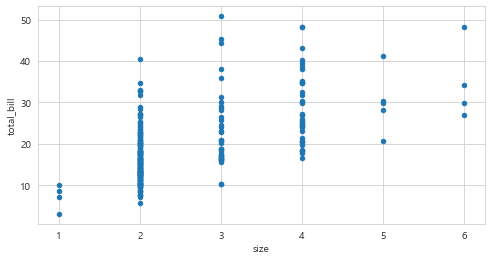

In [22]:
## 데이터프레임은 plot 메소드로 그래프를 바로 그릴 수 있다. 
tips.plot(x='size', y='total_bill',kind='scatter', figsize=(8,4))   
## x 축은 size 열, y 축을 total_bill, kind 매개변수에 scatter로 지정해서 산포도 그래프
## 그래프의 크기는 figsize에 지정
plt.show()                                                         

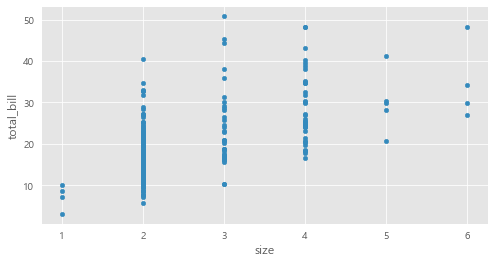

In [19]:
tips.plot.scatter(x='size', y='total_bill', figsize=(8,4))  ## 직접 scatter 메소드로 그래프를 그린다.
plt.show()

- 축(axis)이 문자열인 경우는 striplot(), swarmplot() 이용 

In [25]:
tips['day'].value_counts()                              ## 요일에 대한 발생일 수를 확인한다. 

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

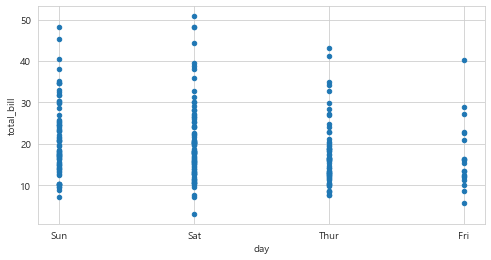

In [26]:
try :
    tips.plot.scatter(x='day', y='total_bill', figsize=(8,4))  
    ## 숫자가 아닌 경우를 x축에 넣으면 예외를 발생시킨다. 
    plt.show()
except Exception as e :
    print(e)

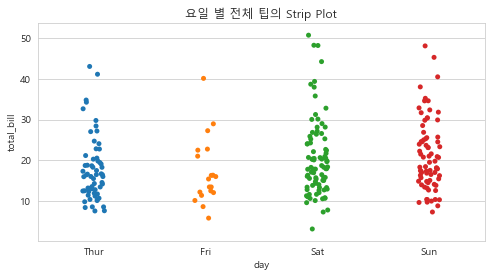

In [27]:
fig, ax = plt.subplots(figsize=(8,4))  ## 기본 그래프로 캔버스와 AXES를 만든다. 
sns.stripplot(x="day", y="total_bill", data=tips, ax=ax) ## stripplot 함수
## 두 축은 문자열로 데이터프레임의 열의 이름을 지정 
## data에 실제 데이터프레임, ax에 axes 객체를 전달한다.
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()

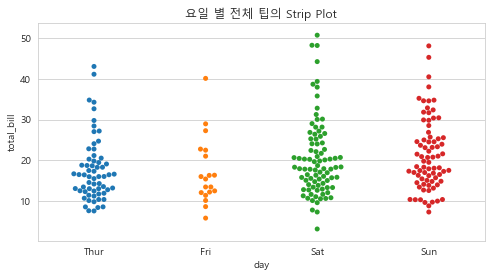

In [28]:
fig, ax = plt.subplots(figsize=(8,4))                                  ## 기본 그래프로 캔버스와 AXES를 만든다. 
sns.swarmplot(x="day", y="total_bill", data=tips, ax=ax)               ## 시본에서 제공하는 stripplot 함수를 사용한다.
                                                                        ## 두 축은 문자열로 데이터프레임의 열의 이름을 지정한다. 
                                                                        ## data에 실제 데이터프레임을 전달한다. 
                                                                        ## ax에 axes 객체를 전달한다.
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()

### Pyecharts로 점 그래프 그리기

In [14]:
import pyecharts.charts as cht                  ## 동적인 시각화 모듈을 사용한다. 
from pyecharts import options as opts

In [15]:
scatter = cht.Scatter()                                         ## 파이이차트의 산포도 그래프 객체를 만든다.
                            
scatter.add_xaxis( tips['size']).add_yaxis("total bill",            ## x축에는 size 열, y축에는 total_bill열을 넣는다.
                                           tips['total_bill'], 
                                           symbol_size=20)          ## symbol의 크기를 지정한다.
                


scatter.set_global_opts(title_opts=opts.TitleOpts(title="Tips "),
                     toolbox_opts=opts.ToolboxOpts())

scatter.render_notebook()

### 상자 그래프 그리기 : box plot

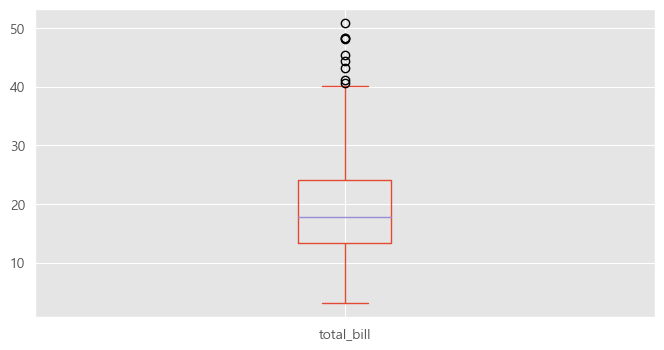

In [16]:
tips.plot.box(y= 'total_bill',figsize=(8,4))                         ## 데이터프레임에서 상자 그래프를 그린다. 
plt.show()

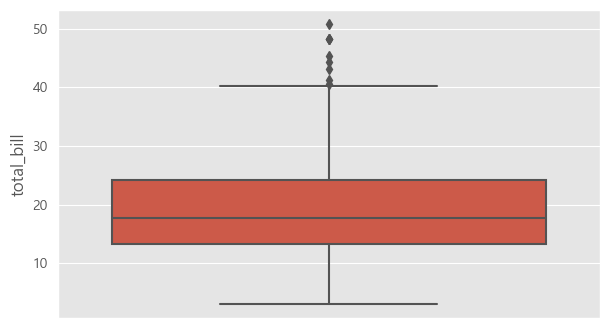

In [17]:
plt.figure(figsize=(7,4))
sns.boxplot(y=tips["total_bill"])
plt.show()

- 요일별 total_bill 그래프

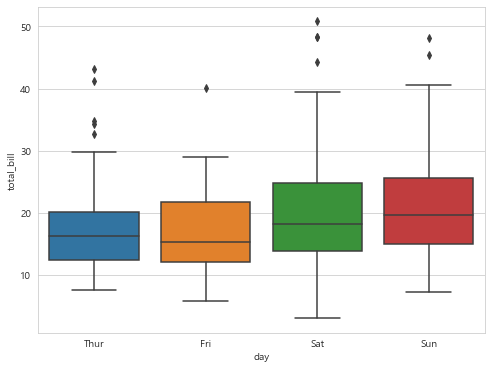

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

- 요일별 total_bill 그래프, hue를 이용하여 그래프 상세화

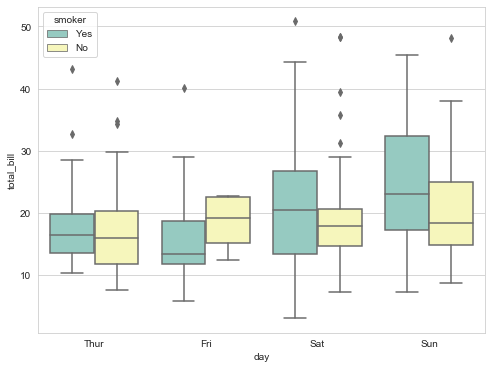

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")
plt.show()

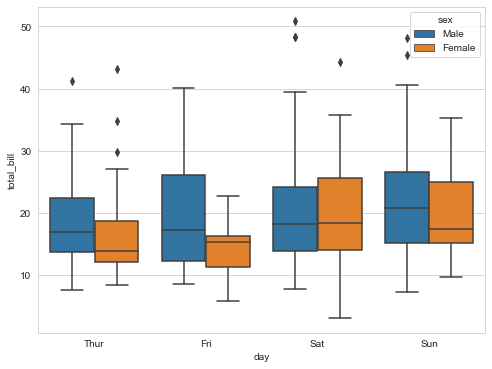

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.show()

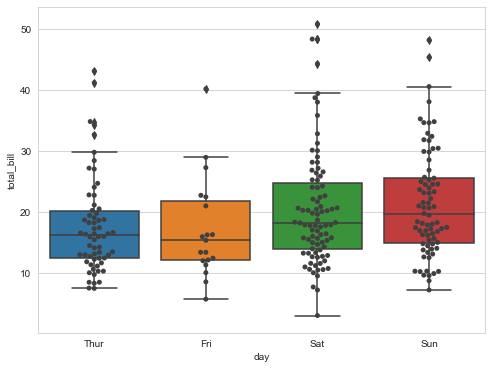

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")
plt.show()

### Pycharts로 상자 그래프 그리기

In [20]:
gr = tips.groupby('day')                       ## 데이터프레임을  요일별로 그룹화 처리하기

In [21]:
tips['day'].value_counts()                  ## 실제 요일은 4개로 분류할 수 있다. 이는 4개로 그룹화처리가 가능하다.

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [22]:
tips['day'].value_counts().index.categories           ## 요일에 대한 그룹화 정보를 확인할 수 있다. 

Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')

In [23]:
tips['day'].value_counts().index.categories.values

array(['Thur', 'Fri', 'Sat', 'Sun'], dtype=object)

In [24]:
a = tips['day'].value_counts().index.categories.values.tolist()   ## 이 그룹화 정보를 하나의 리스트로 저장한다 

In [25]:
a

['Thur', 'Fri', 'Sat', 'Sun']

In [26]:
y_axis = list()                                                ## 빈 리스트를 하나 만든다

In [27]:
for  v in a :
    y_axis.append(gr.get_group(v)['total_bill'].tolist())       ## 빈 리스트에 요일별 그룹화 정보를 넣는다.
                                                                ## 리스트 내부에 리스트를 넣는다.

In [28]:
import pandas as pd
y_axis_ = pd.DataFrame(y_axis)                                ## 이를 데이터 프레임으로 변환한다. 
y_axis_ = y_axis_.fillna(0)                                  ## 결측값은 0으로 처리한다. 

In [29]:
y_axis_t = []

for i in range(4) :
    y_axis_t.append(y_axis_.iloc[i].tolist())              ## 데이터프레임을 다시 리스트로 변환한다

In [30]:
boxplot = cht.Boxplot()

boxplot.add_xaxis(tips['day'].value_counts().index.categories.values.tolist())    ## x축은 요일을 출력

boxplot.add_yaxis("total bill",y_axis_t)                                         ## y축은 요일별로 가진 리스트를 전달한다.

boxplot.set_global_opts(title_opts=opts.TitleOpts(title="Tips "),
                     toolbox_opts=opts.ToolboxOpts())

boxplot.render_notebook()

In [31]:
box_plot = cht.Boxplot()

box_plot = (
    box_plot.add_xaxis(a)
    .add_yaxis("total bill",y_axis_t)
    .set_global_opts(
        title_opts=opts.TitleOpts(
            pos_left="left", title="요일별 팁 "
        ),
        tooltip_opts=opts.TooltipOpts(trigger="item", axis_pointer_type="shadow"),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            boundary_gap=True,
            splitarea_opts=opts.SplitAreaOpts(is_show=False),
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            splitline_opts=opts.SplitLineOpts(is_show=False),
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            name="금액",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
            ),
        ),
    )
    .set_series_opts(tooltip_opts=opts.TooltipOpts(formatter="{b}: {c}"))
)
box_plot.render_notebook()

### lmplot

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


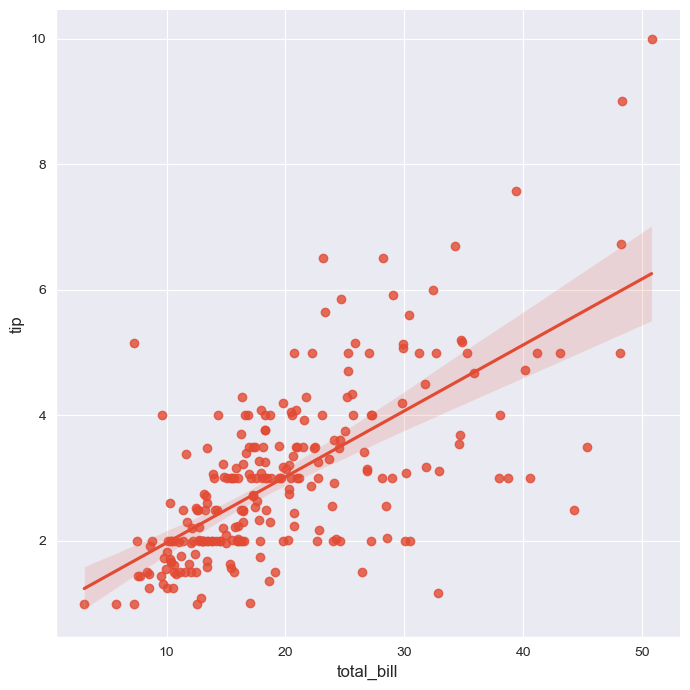

In [33]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, size=7)
plt.show()

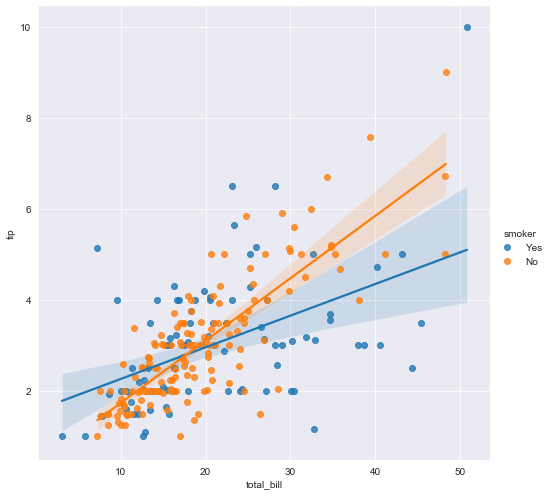

In [19]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, size=7)
plt.show()

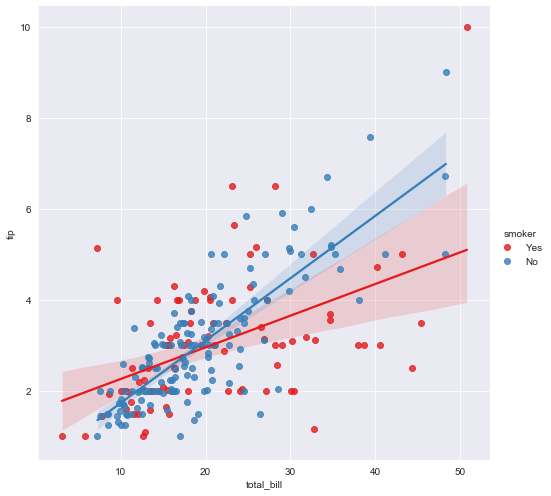

In [20]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, palette="Set1", size=7)
plt.show()

### heat map

In [34]:
uniform_data = np.random.rand(10, 12)
uniform_data.shape

(10, 12)

In [35]:
uniform_data

array([[0.84620451, 0.36659958, 0.08915439, 0.8446689 , 0.7717943 ,
        0.24403002, 0.66896019, 0.00704127, 0.65744415, 0.1493805 ,
        0.56239749, 0.7765544 ],
       [0.21480304, 0.68972188, 0.39678874, 0.03683312, 0.83757196,
        0.60196978, 0.24753187, 0.72161963, 0.90138324, 0.4490879 ,
        0.39832584, 0.03421118],
       [0.26319948, 0.17348897, 0.28525565, 0.5833306 , 0.71592773,
        0.89829232, 0.66918379, 0.75102801, 0.36069001, 0.35720949,
        0.3767723 , 0.28626277],
       [0.73166881, 0.49346457, 0.94254121, 0.90201472, 0.40488994,
        0.94081961, 0.54867867, 0.70200159, 0.83389548, 0.98480631,
        0.03290915, 0.8779638 ],
       [0.41954666, 0.63356522, 0.83242881, 0.56699305, 0.10757619,
        0.86014693, 0.97851521, 0.23418104, 0.75283473, 0.05880641,
        0.96282764, 0.76096262],
       [0.00976647, 0.19079062, 0.46883734, 0.58039236, 0.67132257,
        0.08476342, 0.97811079, 0.18784883, 0.99136331, 0.15607374,
        0.51980572,

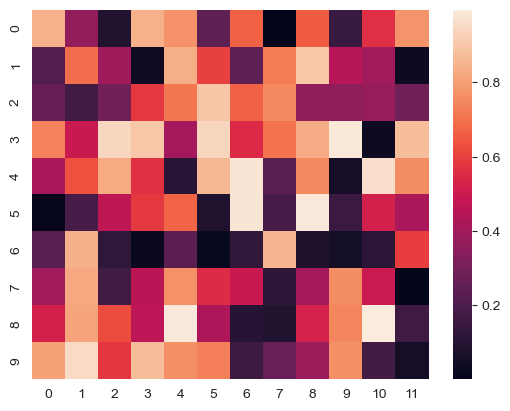

In [36]:
sns.heatmap(uniform_data)
plt.show()

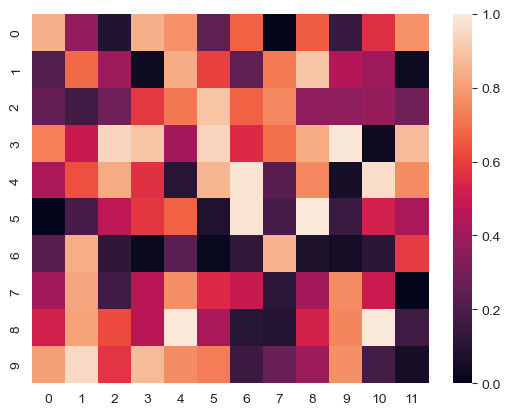

In [37]:
sns.heatmap(uniform_data, vmin=0, vmax=1)
plt.show()

In [33]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [34]:
flights.shape

(144, 3)

In [35]:
flights = flights.pivot("month", "year", "passengers")
flights.head(5)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


In [36]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


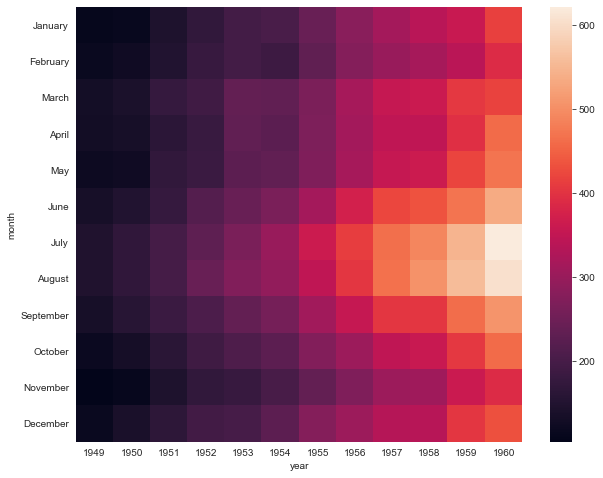

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(flights)
plt.show()

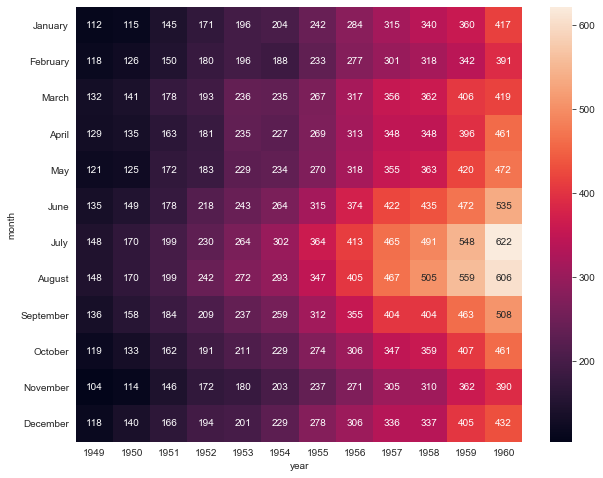

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt="d")
plt.show()

### pairplot

In [39]:
sns.set(style="ticks")
iris = sns.load_dataset("iris")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [40]:
iris.shape

(150, 5)

<Figure size 288x288 with 0 Axes>

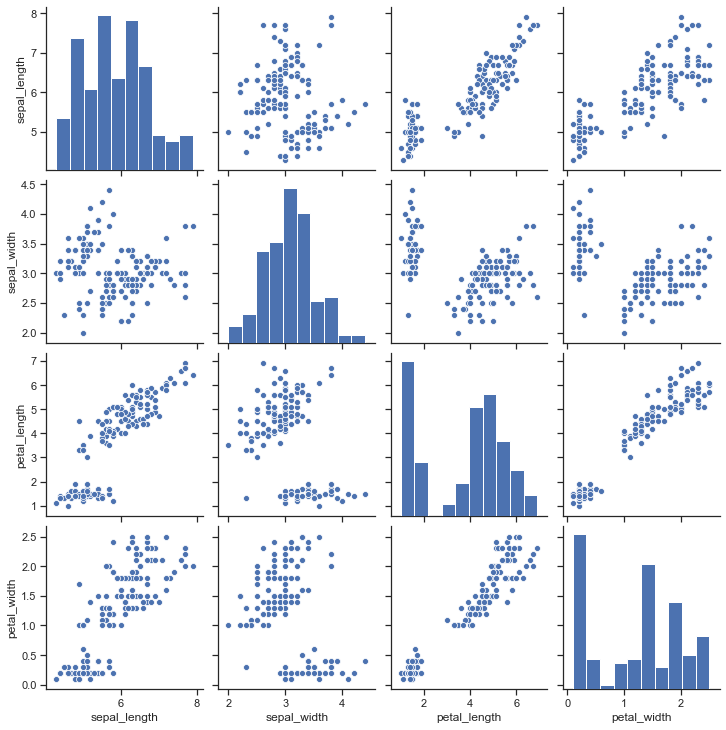

In [41]:
plt.figure(figsize=(4,4))
sns.pairplot(iris)
plt.show()

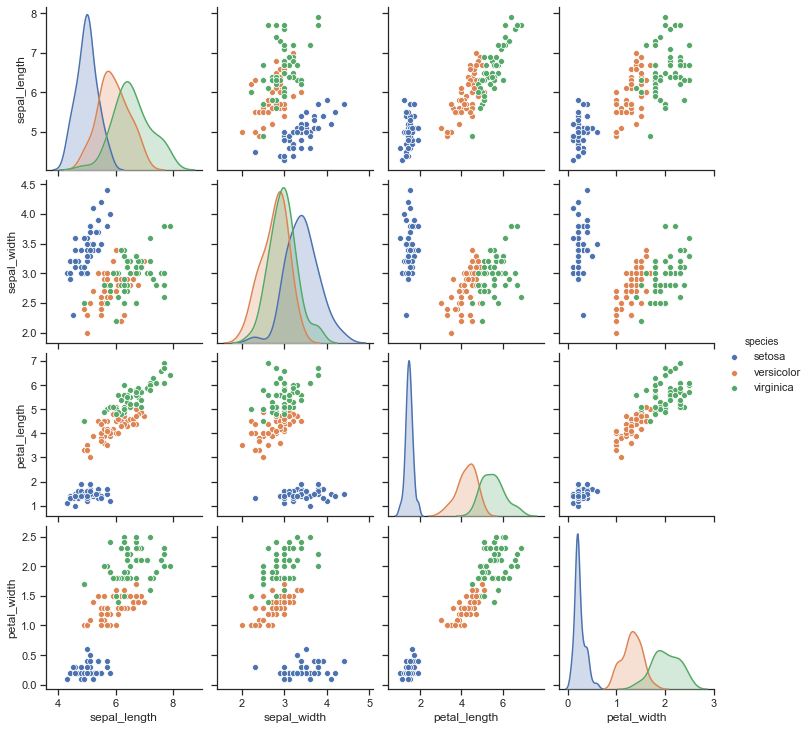

In [42]:
sns.pairplot(iris, hue="species")
plt.show()

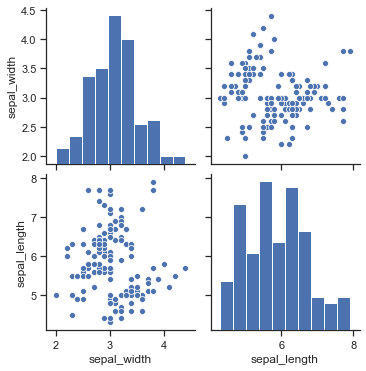

In [43]:
sns.pairplot(iris, vars=["sepal_width", "sepal_length"])
plt.show()

In [44]:
iris.corr() # 상관계수 -1 ~ 1

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


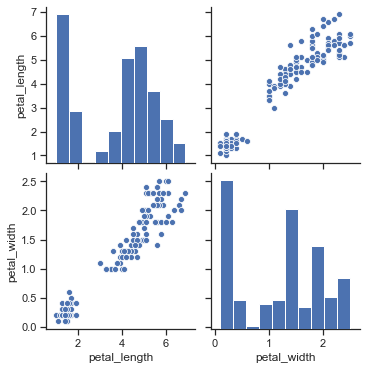

In [45]:
sns.pairplot(iris, vars=["petal_length", "petal_width"])
plt.show()